<a href="https://colab.research.google.com/github/ThanhPhuongDA/webscraping/blob/main/TSLA_StockpricesYahoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [1]:
import time
import datetime
import pandas as pd
import matplotlib.pyplot as plt


Work with TESLA stock (TSLA) and choose the time period that you want to get data of TESLA stock prices from Yahoo Finance

In [2]:
ticker = 'TSLA'
period1 = int(time.mktime(datetime.datetime(2021,1,1,23,59).timetuple()))
period2 = int(time.mktime(datetime.datetime(2022,12,31,23,59).timetuple()))
interval = '1wk'

Call the query string

In [3]:
query_string = f'https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={period1}&period2={period2}&interval={interval}&events=history&includeAdjustedClose=true'

In [4]:
print(query_string)

https://query1.finance.yahoo.com/v7/finance/download/TSLA?period1=1609545540&period2=1672531140&interval=1wk&events=history&includeAdjustedClose=true


Read the file in CSV format

In [5]:
df = pd.read_csv(query_string)
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-01-01  239.820007  272.329987  239.063339  272.013336  272.013336   
1  2021-01-08  285.333344  294.829987  267.873322  281.666656  281.666656   
2  2021-01-15  284.000000  286.633331  273.033325  281.663330  281.663330   
3  2021-01-22  278.103333  300.133331  267.000000  278.476654  278.476654   
4  2021-01-29  276.666656  293.500000  260.033325  283.329987  283.329987   

      Volume  
0  531246900  
1  735619800  
2  330994800  
3  414250500  
4  356653800  


In [6]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [7]:
df['Change'] = df.apply(lambda x: x['Adj Close'] - x['Open'], axis=1)



In [8]:
df['%Change'] = df.apply(lambda x: round((x['Change']/ x['Open'])*100,2), axis=1)

In [9]:
print(df.head())

         Date        Open        High         Low       Close   Adj Close  \
0  2021-01-01  239.820007  272.329987  239.063339  272.013336  272.013336   
1  2021-01-08  285.333344  294.829987  267.873322  281.666656  281.666656   
2  2021-01-15  284.000000  286.633331  273.033325  281.663330  281.663330   
3  2021-01-22  278.103333  300.133331  267.000000  278.476654  278.476654   
4  2021-01-29  276.666656  293.500000  260.033325  283.329987  283.329987   

      Volume     Change  %Change  
0  531246900  32.193329    13.42  
1  735619800  -3.666688    -1.29  
2  330994800  -2.336670    -0.82  
3  414250500   0.373321     0.13  
4  356653800   6.663331     2.41  


Export to CSV file in your local computer


In [10]:
df.to_csv(r'C:\Users\PHUONG\Desktop\Tesla stock price 2022.csv', index=False, header=True)

In [11]:
df.shape

(105, 9)

In [12]:
# Changing the datatype

df["Date"] = df["Date"].astype("datetime64")
 
# Setting the Date as index

df = df.set_index("Date")
df

,Open,High,Low,Close,Adj Close,Volume,Change,%Change
Date,,,,,,,,
2021-01-01,239.820007,272.329987,239.063339,272.013336,272.013336,531246900,32.193329,13.42
2021-01-08,285.333344,294.829987,267.873322,281.666656,281.666656,735619800,-3.666688,-1.29
2021-01-15,284.000000,286.633331,273.033325,281.663330,281.663330,330994800,-2.336670,-0.82
2021-01-22,278.103333,300.133331,267.000000,278.476654,278.476654,414250500,0.373321,0.13
2021-01-29,276.666656,293.500000,260.033325,283.329987,283.329987,356653800,6.663331,2.41
...,...,...,...,...,...,...,...,...
2022-12-02,191.779999,196.250000,169.059998,173.440002,173.440002,440757200,-18.339997,-9.56
2022-12-09,173.839996,182.500000,153.279999,157.669998,157.669998,653546300,-16.169998,-9.30
2022-12-16,159.639999,160.990005,122.260002,125.349998,125.349998,793493800,-34.290001,-21.48


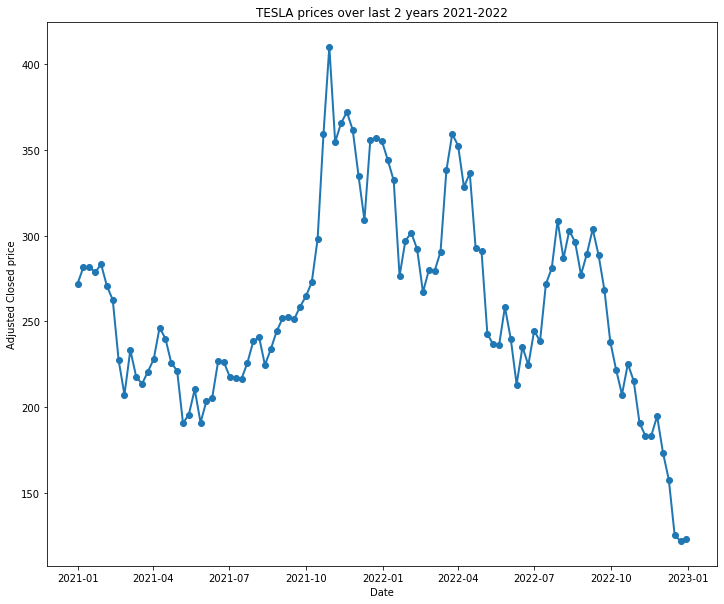

In [13]:
# Create figure

fig = plt.figure(figsize=(12, 10))
plt.plot(df["Adj Close"], marker='o',linewidth=2.0)

plt.xlabel("Date")
plt.ylabel("Adjusted Closed price")
plt.title("TESLA prices over last 2 years 2021-2022")

# Display

plt.show()